# Dense Sentiment Classifier #

In this notebook we will build deep NN to classify Sentiments using Keras

In [1]:
import keras
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
import pandas as pd 
from keras.layers import Dense, Flatten, Dropout 
from keras.layers import Embedding
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint

import os 
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
%matplotlib inline 

Using TensorFlow backend.


**Set Hyperparameter**

In [2]:
output_dir = 'data/dense'

#Training 
epochs = 4
batch_size = 128

#vector-space embedding
n_dim = 64
n_unique_words = 5000
n_words_to_skip = 50
max_review_length = 130
pad_type = trunc_type = 'pre'

#NN
n_dense = 128
dropout = 0.5

**Load Data**

In [3]:
(X_train,y_train),(X_valid,y_valid) = imdb.load_data(num_words=n_unique_words,skip_top=n_words_to_skip)

In [4]:
X_train.shape,y_train.shape

((25000,), (25000,))

In [5]:
X_valid.shape,y_valid.shape

((25000,), (25000,))

In [6]:
X_train[0:1]

array([ list([2, 2, 2, 2, 2, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 2, 173, 2, 256, 2, 2, 100, 2, 838, 112, 50, 670, 2, 2, 2, 480, 284, 2, 150, 2, 172, 112, 167, 2, 336, 385, 2, 2, 172, 4536, 1111, 2, 546, 2, 2, 447, 2, 192, 50, 2, 2, 147, 2025, 2, 2, 2, 2, 1920, 4613, 469, 2, 2, 71, 87, 2, 2, 2, 530, 2, 76, 2, 2, 1247, 2, 2, 2, 515, 2, 2, 2, 626, 2, 2, 2, 62, 386, 2, 2, 316, 2, 106, 2, 2, 2223, 2, 2, 480, 66, 3785, 2, 2, 130, 2, 2, 2, 619, 2, 2, 124, 51, 2, 135, 2, 2, 1415, 2, 2, 2, 2, 215, 2, 77, 52, 2, 2, 407, 2, 82, 2, 2, 2, 107, 117, 2, 2, 256, 2, 2, 2, 3766, 2, 723, 2, 71, 2, 530, 476, 2, 400, 317, 2, 2, 2, 2, 1029, 2, 104, 88, 2, 381, 2, 297, 98, 2, 2071, 56, 2, 141, 2, 194, 2, 2, 2, 226, 2, 2, 134, 476, 2, 480, 2, 144, 2, 2, 2, 51, 2, 2, 224, 92, 2, 104, 2, 226, 65, 2, 2, 1334, 88, 2, 2, 283, 2, 2, 4472, 113, 103, 2, 2, 2, 2, 2, 178, 2])], dtype=object)

In [7]:
lengths = [len(x) for x in X_train]

In [8]:
np.mean(lengths)

238.71364

**Restoring the word from word index**

In [9]:
word_index = keras.datasets.imdb.get_word_index()
word_index = {k:(v+3) for k,v in word_index.items()}

In [10]:
#Manually set the PAD , START, UNK indexes 
word_index['PAD']=0
word_index['START']=1
word_index['UNK']=2

In [11]:
word_index

{'fawn': 34704,
 'tsukino': 52009,
 'nunnery': 52010,
 'sonja': 16819,
 'vani': 63954,
 'woods': 1411,
 'spiders': 16118,
 'hanging': 2348,
 'woody': 2292,
 'trawling': 52011,
 "hold's": 52012,
 'comically': 11310,
 'localized': 40833,
 'disobeying': 30571,
 "'royale": 52013,
 "harpo's": 40834,
 'canet': 52014,
 'aileen': 19316,
 'acurately': 52015,
 "diplomat's": 52016,
 'rickman': 25245,
 'arranged': 6749,
 'rumbustious': 52017,
 'familiarness': 52018,
 "spider'": 52019,
 'hahahah': 68807,
 "wood'": 52020,
 'transvestism': 40836,
 "hangin'": 34705,
 'bringing': 2341,
 'seamier': 40837,
 'wooded': 34706,
 'bravora': 52021,
 'grueling': 16820,
 'wooden': 1639,
 'wednesday': 16821,
 "'prix": 52022,
 'altagracia': 34707,
 'circuitry': 52023,
 'crotch': 11588,
 'busybody': 57769,
 "tart'n'tangy": 52024,
 'burgade': 14132,
 'thrace': 52026,
 "tom's": 11041,
 'snuggles': 52028,
 'francesco': 29117,
 'complainers': 52030,
 'templarios': 52128,
 '272': 40838,
 '273': 52031,
 'zaniacs': 52133,

In [12]:
index_words = {v:k for k,v in word_index.items()}

In [13]:
' '.join(index_words[id] for id in X_train[0])

"UNK UNK UNK UNK UNK brilliant casting location scenery story direction everyone's really suited UNK part UNK played UNK UNK could UNK imagine being there robert UNK UNK UNK amazing actor UNK now UNK same being director UNK father came UNK UNK same scottish island UNK myself UNK UNK loved UNK fact there UNK UNK real connection UNK UNK UNK UNK witty remarks throughout UNK UNK were great UNK UNK UNK brilliant UNK much UNK UNK bought UNK UNK UNK soon UNK UNK UNK released UNK UNK UNK would recommend UNK UNK everyone UNK watch UNK UNK fly UNK UNK amazing really cried UNK UNK end UNK UNK UNK sad UNK UNK know what UNK say UNK UNK cry UNK UNK UNK UNK must UNK been good UNK UNK definitely UNK also UNK UNK UNK two little UNK UNK played UNK UNK UNK norman UNK paul UNK were UNK brilliant children UNK often left UNK UNK UNK UNK list UNK think because UNK stars UNK play them UNK grown up UNK such UNK big UNK UNK UNK whole UNK UNK these children UNK amazing UNK should UNK UNK UNK what UNK UNK done do

In [14]:
(all_x_train,_),(all_x_valid,_) = imdb.load_data() 

In [15]:
' '.join(index_words[id] for id in all_x_train[0])

"START this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shou

**Preprocess Data**

In [16]:
X_train = pad_sequences(X_train,maxlen=max_review_length,padding=pad_type,value=0)
X_valid = pad_sequences(X_valid,maxlen=max_review_length,padding=pad_type,value=0)

**Design Neural Network**

In [17]:
model = Sequential()
model.add(Embedding(n_unique_words, n_dim, input_length=max_review_length))
model.add(Flatten())
model.add(Dense(n_dense, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 130, 64)           320000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 8320)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1065088   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 1,385,217
Trainable params: 1,385,217
Non-trainable params: 0
_________________________________________________________________


**Confihure Model**

In [19]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
modelcheckpoint = ModelCheckpoint(filepath=output_dir+"/weights.{epoch:02d}.hdf5")

In [21]:
# Check if the output dir is present or not
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

**Train :) **

In [22]:
X_valid.shape,y_valid.shape

((25000, 130), (25000,))

In [23]:
# 85.7% validation accuracy in epoch 1
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,verbose=1, validation_data=(X_valid, y_valid), callbacks=[modelcheckpoint])

Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 18s 723us/step - loss: 0.4828 - acc: 0.7481 - val_loss: 0.3270 - val_acc: 0.8576
Epoch 2/4
25000/25000 [==============================] - 18s 706us/step - loss: 0.2014 - acc: 0.9251 - val_loss: 0.3534 - val_acc: 0.8494
Epoch 3/4
25000/25000 [==============================] - 19s 774us/step - loss: 0.0441 - acc: 0.9920 - val_loss: 0.4465 - val_acc: 0.8448
Epoch 4/4
25000/25000 [==============================] - 19s 743us/step - loss: 0.0063 - acc: 0.9996 - val_loss: 0.5067 - val_acc: 0.8492


In [26]:
model.load_weights(output_dir+"/weights.01.hdf5")

In [28]:
y_hat = model.predict_proba(X_valid)

In [29]:
len(y_hat)

25000

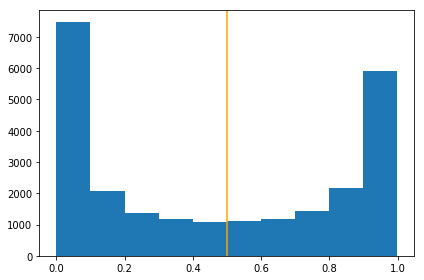

In [31]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')
plt.tight_layout()

**Evaluate the model**

In [34]:
auc = roc_auc_score(y_valid,y_hat)*100

In [35]:
"{:0.2f}".format(auc)

'93.65'

**Save the Model**

In [37]:
y_hat_float = [y[0] for y in y_hat]


In [39]:
data = pd.DataFrame(list(zip(y_hat_float,y_valid)),columns=['y_hat','y'])

In [40]:
data.head(10)

y_hat  y
0  0.523506  0
1  0.954348  1
2  0.327358  1
3  0.272810  0
4  0.966172  1
5  0.692571  1
6  0.650770  1
7  0.024575  0
8  0.846745  0
9  0.861236  1

In [41]:
data.to_csv('data/dense/validaion_output.csv')

**Check the Wrong Predictions**

In [50]:
data[(data.y_hat > 0.99) & (data.y==0)].head(10)

y_hat  y
11971  0.990622  0

In [57]:
' '.join(index_words[id] for id in all_x_valid[11971])

"START this film derives from a long running itv sitcom by the same name the sitcom lasted for half a decade roughly and brought to our screens phillip alan mrs jones vienna br br then in 1980 the film version hit the cinemas now when it did sadly richard beckinsale had passed away was replaced by only when i laugh actor chris br br i myself felt this gave the film a different feel i would have preferred if it wasn't shot as richard was a key character thats like having the porridge film without or mackay br br the film did have some classics moments definitely but it felt a bit de ja vu many parts were seen before in the tv series now if you saw the movie first rather than the series you would get a different feeling about it then the series fan br br saying that leonard is definitely on top form and makes the movie just like in the tv series the film has recently had a new lease of life on dvd and is usually on terrestrial over a quiet weekend it is a cracking good film but for fans 

In [54]:
data[(data.y_hat <0.001) & (data.y==1)].head(10)

y_hat  y
10184  0.000957  1
12612  0.000344  1

In [56]:
' '.join(index_words[id] for id in all_x_valid[12612])

"START black tar can't be there's a documentary dark end of the street about s f street punks and b t abuse not bad quite heavy in wasted there's this stuff that looks like coke but should be something else no big deal black tar can't be there's a documentary dark end of the street about s f street punks and b t abuse not bad quite heavy in wasted there's this stuff that looks like coke but should be something else no big deal black tar can't be there's a documentary dark end of the street about s f street punks and b t abuse not bad quite heavy in wasted there's this stuff that looks like coke but should be something else no big deal"